<a href="https://colab.research.google.com/github/axellebersier/Urban_data_mining/blob/main/Data_description_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Processing**


##Data description

Set up and load the data

In [207]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [208]:
import pandas as pd

url = 'https://github.com/axellebersier/Urban_data_mining/blob/main/Data/data_2020_finale.xlsx?raw=true'
df_2020 = pd.read_excel(url)



##Data Description 2020

In [209]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2184 non-null   int64  
 1   natural_growth_1000    2184 non-null   float64
 2   density                2184 non-null   float64
 3   dependency_ratio       2184 non-null   float64
 4   migration_intern       2184 non-null   float64
 5   migration              2184 non-null   float64
 6   p_employment           2184 non-null   float64
 7   primary_sector         2184 non-null   float64
 8   secondary_sector       2184 non-null   float64
 9   tertiary_sector        2184 non-null   float64
 10  p_social_assistance    2184 non-null   float64
 11  p_new_buildings        2184 non-null   float64
 12  p_new_housings         2184 non-null   float64
 13  p_cinema               2184 non-null   float64
 14  p_museum               2184 non-null   float64
 15  p_cu

In [210]:
df_2020.describe()

,ID,natural_growth_1000,density,dependency_ratio,migration_intern,migration,p_employment,primary_sector,secondary_sector,tertiary_sector,...,p_individual_houses,Population,p_infrastructure,p_forested,p_agriculture,p_improductible,surface_polygone,lat,long,net_income_h
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,...,2184.000000,2184.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2134.000000,2134.000000,2181.000000
mean,3307.924908,0.660727,441.641367,67.129534,4.096665,4.260221,0.300424,0.343857,1.788127,5.987474,...,59.447089,3942.270238,0.158755,0.326661,0.449576,0.064889,1833.079065,0.429249,0.579929,37801.025227
std,2127.798693,6.096123,796.810807,9.305558,20.887248,8.759388,0.292926,1.312787,6.722254,36.221980,...,13.572307,12846.563424,0.153173,0.161538,0.192024,0.137973,3315.417620,0.208723,0.230170,15293.687372
min,1.000000,-43.243243,0.825294,31.481481,-125.786164,-91.019581,0.000000,0.000000,0.000000,0.000000,...,0.000000,32.000000,0.001505,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,11175.581395
25%,1088.750000,-2.187167,82.685270,61.176118,-7.197008,0.000000,0.139959,0.015776,0.032572,0.127971,...,51.460317,726.000000,0.062401,0.207403,0.318961,0.003091,438.000000,0.266951,0.409683,30794.861254
50%,3338.500000,0.879135,187.947903,66.375132,2.582811,3.368561,0.227129,0.070462,0.206984,0.572246,...,61.538462,1567.500000,0.108153,0.312808,0.469333,0.010804,825.000000,0.417932,0.618843,34905.338901
75%,5414.250000,3.993104,472.690650,72.042423,13.721007,7.240759,0.360566,0.247098,0.987660,2.580478,...,69.028429,3849.000000,0.204127,0.427993,0.598468,0.047185,1670.500000,0.591601,0.782052,40383.043646
max,6810.000000,38.834951,12796.986817,168.750000,154.838710,94.339623,4.941860,43.600000,163.761905,925.361660,...,96.153846,421878.000000,0.983051,0.893204,0.916667,0.949424,43861.000000,1.000000,1.000000,452632.653061


In [211]:
w_pop = df_2020.iloc[:, 22].tolist()  # the column of the population

w_surf = df_2020.iloc[:, 27].tolist() # the column of the surface

In [212]:
print(df_2020.columns)
df_2020.drop('Population', axis=1, inplace=True)
df_2020.drop('surface_polygone', axis=1, inplace=True)

Index(['ID', 'natural_growth_1000', 'density', 'dependency_ratio',
       'migration_intern', 'migration', 'p_employment', 'primary_sector',
       'secondary_sector', 'tertiary_sector', 'p_social_assistance',
       'p_new_buildings', 'p_new_housings', 'p_cinema', 'p_museum',
       'p_culture_institution', 'size_households', 'p_new_entreprise',
       'p_weddings', 'p_strangers', 'p_cultural_place', 'p_individual_houses',
       'Population', 'p_infrastructure', 'p_forested', 'p_agriculture',
       'p_improductible', 'surface_polygone', 'lat', 'long', 'net_income_h'],
      dtype='object')


In [213]:
print(df_2020.columns)

Index(['ID', 'natural_growth_1000', 'density', 'dependency_ratio',
       'migration_intern', 'migration', 'p_employment', 'primary_sector',
       'secondary_sector', 'tertiary_sector', 'p_social_assistance',
       'p_new_buildings', 'p_new_housings', 'p_cinema', 'p_museum',
       'p_culture_institution', 'size_households', 'p_new_entreprise',
       'p_weddings', 'p_strangers', 'p_cultural_place', 'p_individual_houses',
       'p_infrastructure', 'p_forested', 'p_agriculture', 'p_improductible',
       'lat', 'long', 'net_income_h'],
      dtype='object')


In [214]:
df_2020.head()

,ID,natural_growth_1000,density,dependency_ratio,migration_intern,migration,p_employment,primary_sector,secondary_sector,tertiary_sector,...,p_strangers,p_cultural_place,p_individual_houses,p_infrastructure,p_forested,p_agriculture,p_improductible,lat,long,net_income_h
0,1,-1.001252,254.614412,60.095390,11.013767,3.504380,0.104767,0.165217,0.126087,1.695652,...,14.399206,0.011420,69.189189,0.131479,0.307206,0.501896,0.058154,0.571049,0.735113,57602.624937
1,2,2.114509,1160.434372,63.352386,-6.099545,5.611581,0.415494,0.058111,1.542373,6.836562,...,29.001546,0.006673,54.693235,0.302172,0.280453,0.401322,0.011331,0.562169,0.738128,36520.937983
2,3,4.650331,755.047106,68.620379,-0.536577,1.073153,0.109269,0.000000,0.000000,0.231276,...,17.308378,0.005882,71.557156,0.177658,0.286676,0.526245,0.010767,0.565600,0.756055,45237.221823
3,4,2.118644,279.485294,67.444934,9.533898,1.324153,0.139963,1.308642,1.728395,9.938272,...,15.837937,0.008156,69.065421,0.133088,0.291176,0.553676,0.025000,0.581732,0.719495,45790.855772
4,5,0.528192,581.163859,62.875536,-2.905057,5.017826,0.363636,0.001509,0.036280,0.045800,...,17.364954,0.006061,74.683544,0.199081,0.332312,0.464012,0.007657,0.562229,0.748243,48875.224987


In [215]:
df_2020 =  df_2020.iloc[:,2:]
df_2020

,density,dependency_ratio,migration_intern,migration,p_employment,primary_sector,secondary_sector,tertiary_sector,p_social_assistance,p_new_buildings,...,p_strangers,p_cultural_place,p_individual_houses,p_infrastructure,p_forested,p_agriculture,p_improductible,lat,long,net_income_h
0,254.614412,60.095390,11.013767,3.504380,0.104767,0.165217,0.126087,1.695652,1.31247,1.514387,...,14.399206,0.011420,69.189189,0.131479,0.307206,0.501896,0.058154,0.571049,0.735113,57602.624937
1,1160.434372,63.352386,-6.099545,5.611581,0.415494,0.058111,1.542373,6.836562,3.18621,0.731529,...,29.001546,0.006673,54.693235,0.302172,0.280453,0.401322,0.011331,0.562169,0.738128,36520.937983
2,755.047106,68.620379,-0.536577,1.073153,0.109269,0.000000,0.000000,0.231276,1.13065,0.179469,...,17.308378,0.005882,71.557156,0.177658,0.286676,0.526245,0.010767,0.565600,0.756055,45237.221823
3,279.485294,67.444934,9.533898,1.324153,0.139963,1.308642,1.728395,9.938272,1.25300,0.799787,...,15.837937,0.008156,69.065421,0.133088,0.291176,0.553676,0.025000,0.581732,0.719495,45790.855772
4,581.163859,62.875536,-2.905057,5.017826,0.363636,0.001509,0.036280,0.045800,1.27051,0.529381,...,17.364954,0.006061,74.683544,0.199081,0.332312,0.464012,0.007657,0.562229,0.748243,48875.224987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,61.202186,76.100629,5.361930,-3.574620,0.350000,0.329268,2.121951,0.378049,2.50447,0.000000,...,7.142857,0.010714,67.619048,0.063388,0.375956,0.557377,0.002186,0.269920,0.822962,28356.529517
2180,53.862847,89.755352,-4.840662,16.135539,0.211926,0.166256,0.206897,0.182266,3.06947,0.807754,...,9.347301,0.000000,75.849732,0.076389,0.473524,0.442274,0.006076,0.246207,0.832615,25643.699515
2181,20.453441,75.660640,9.501188,-1.583531,0.257324,0.113249,0.067620,0.207806,2.69200,3.167063,...,7.363420,0.004751,60.363086,0.037895,0.517247,0.432389,0.012794,0.263552,0.771465,26472.050673
2182,26.777425,81.157025,10.087116,2.751032,0.520985,0.492593,1.722222,0.588889,1.01382,0.921659,...,7.755474,0.005474,75.135135,0.042756,0.396775,0.559980,0.000489,0.228363,0.787803,28861.658986


In [216]:
df_2020 = pd.DataFrame(df_2020)
corr_matrix_2020 = df_2020.corr()

##Description of the correlations for 2020

Correlation matrix

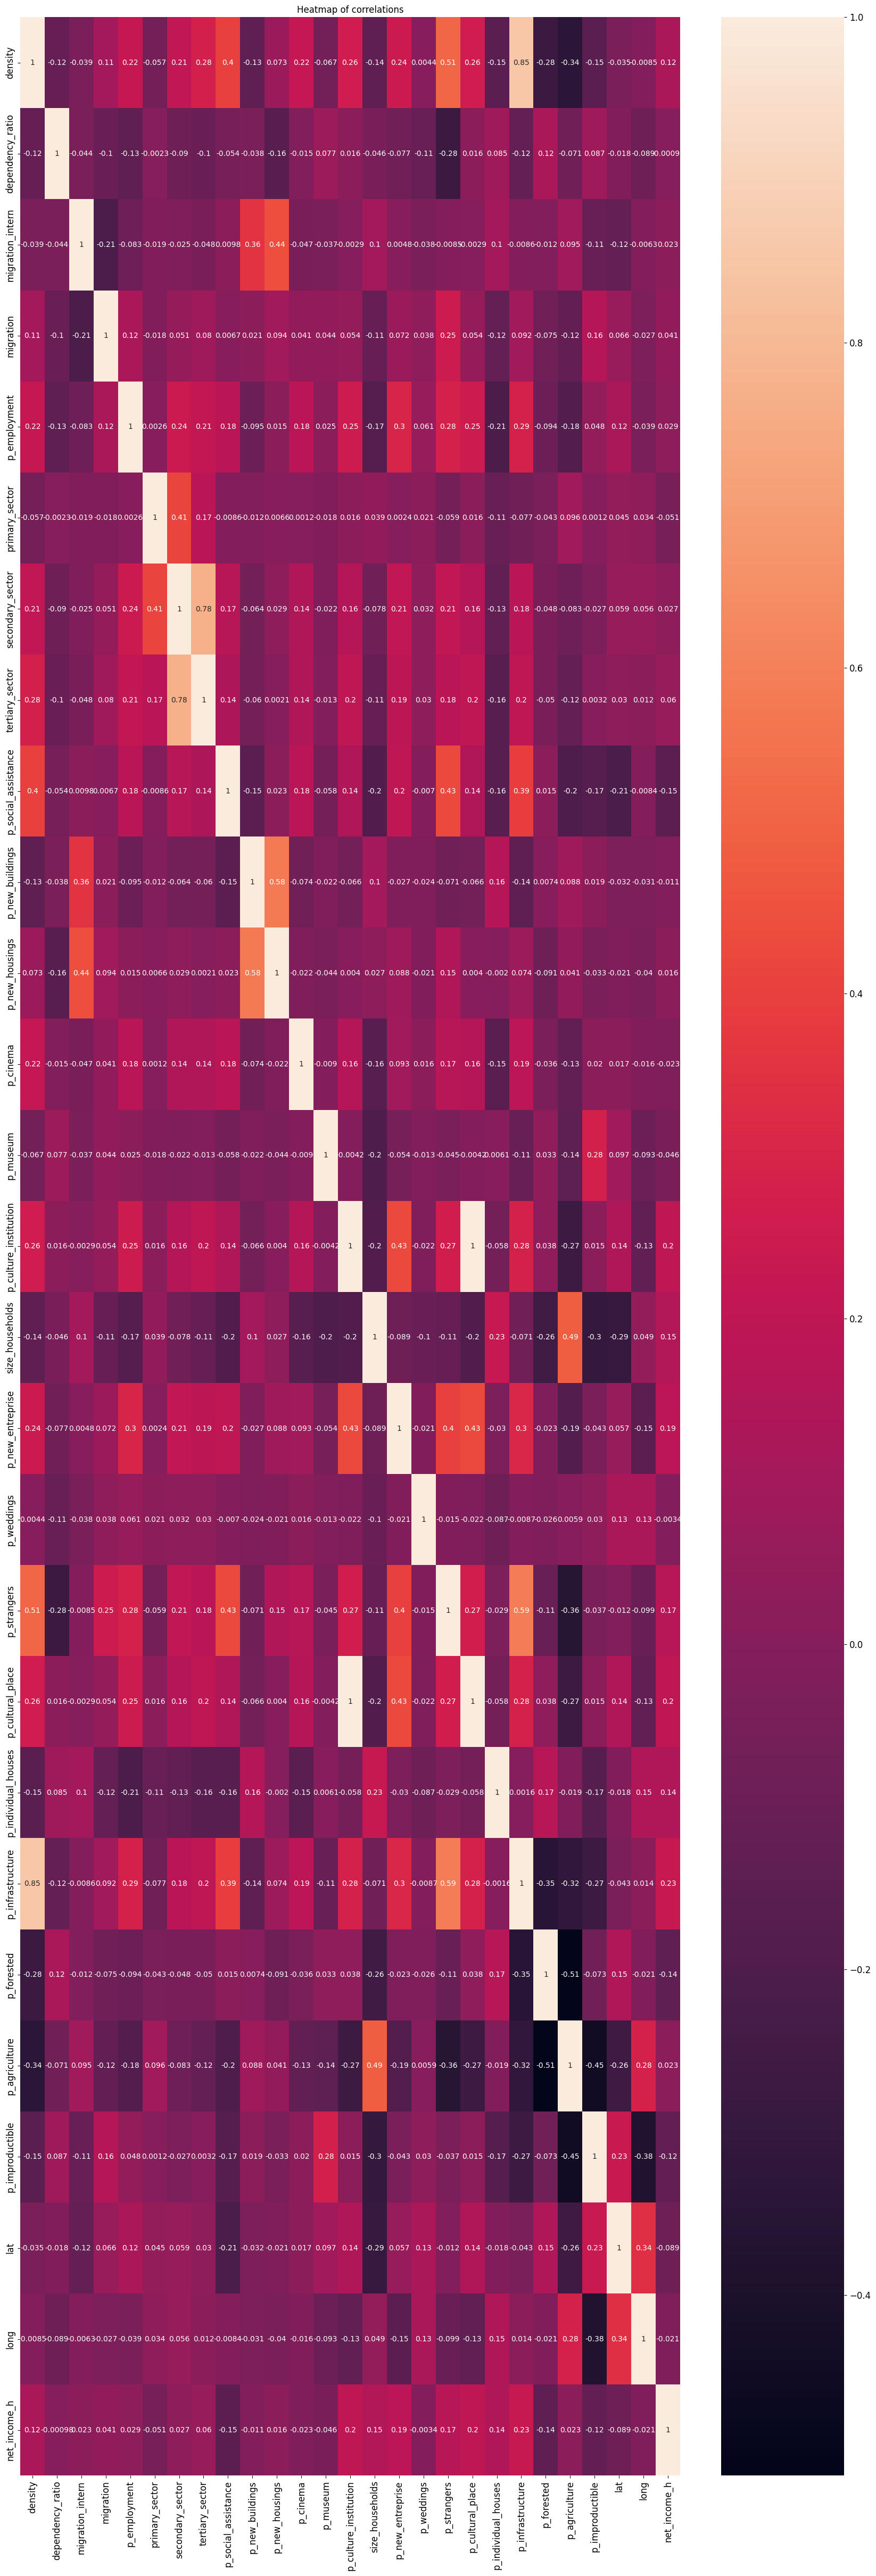

In [217]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix_2020, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (20,60)
plt.show()


Principal component Analysis => cf code in R

##Number of clusters

Silhouette score

set up to do a K-Means analysis

In [218]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Data preprocessing and standardization

In [219]:
from sklearn.preprocessing import StandardScaler
nostdf_2020 = df_2020
scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)
df_2020 = pd.DataFrame(stdf_2020)
print(df_2020)

            0         1         2         3         4         5         6   \
0    -0.234773 -0.756081  0.331240 -0.086309 -0.668096 -0.136108 -0.247301   
1     0.902294 -0.405995 -0.488267  0.154311  0.392917 -0.217713 -0.036567   
2     0.393415  0.160247 -0.221872 -0.363929 -0.652722 -0.261989 -0.266062   
3    -0.203553  0.033901  0.260373 -0.335268 -0.547913  0.735082 -0.008888   
4     0.175141 -0.457251 -0.335292  0.086511  0.215844 -0.260839 -0.260664   
...        ...       ...       ...       ...       ...       ...       ...   
2179 -0.477562  0.964278  0.060590 -0.894656  0.169282 -0.011115  0.049671   
2180 -0.486775  2.431987 -0.427982  1.356035 -0.302189 -0.135316 -0.235277   
2181 -0.528713  0.916985  0.258807 -0.667294 -0.147172 -0.175703 -0.256001   
2182 -0.520775  1.507777  0.286865 -0.172333  0.753131  0.113324 -0.009806   
2183 -0.508532  1.649537 -0.406485 -1.088260 -0.273716 -0.182788 -0.256472   

            7         8         9   ...        17        18    

Determination of the parameters and the number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

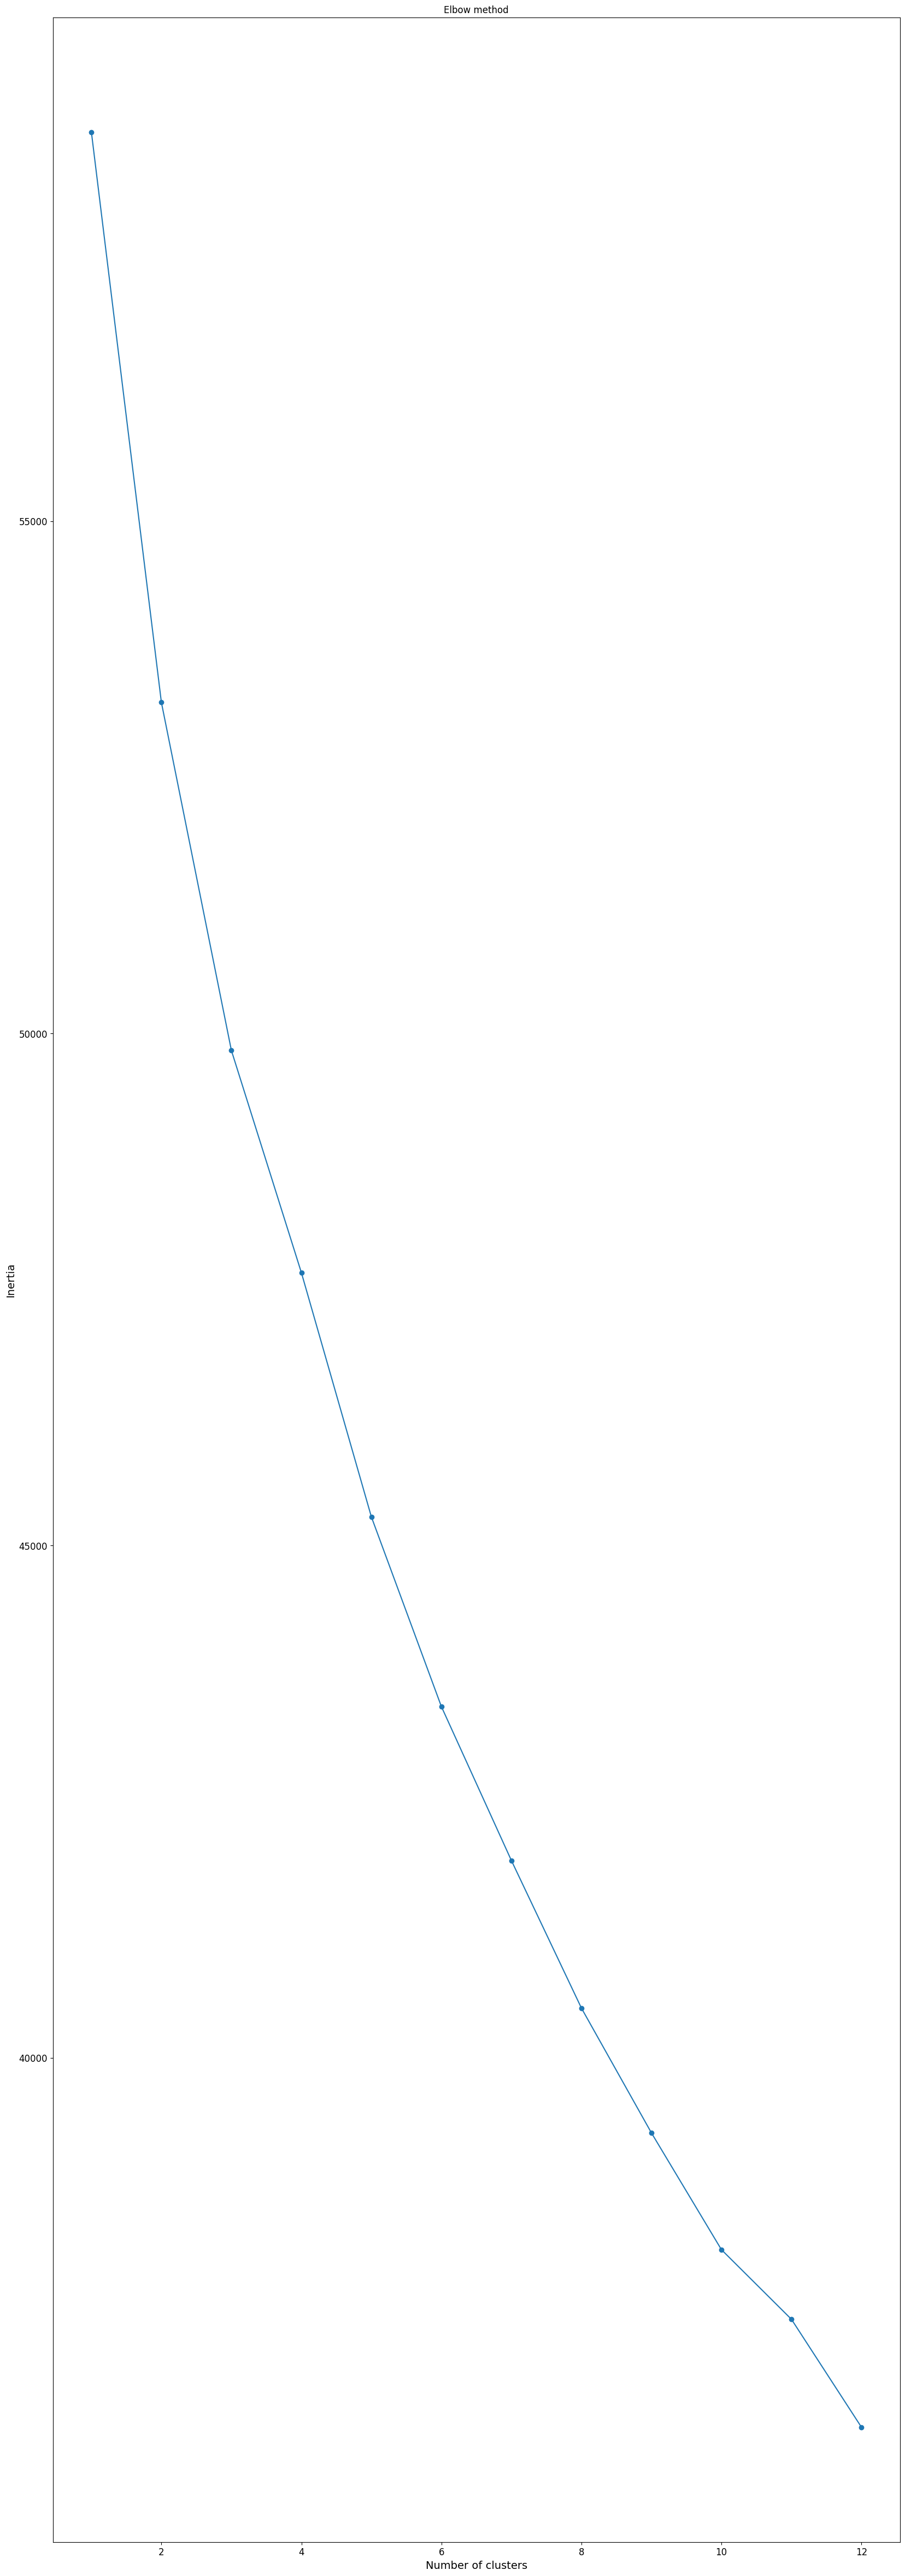

In [220]:
from sklearn.cluster import KMeans

df_2020 = np.nan_to_num(df_2020, nan=0)

inertias = []

for i in range(1,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_2020)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,13), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [221]:
silhouette_ann= []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(num_clusters)
  kmeans.fit(df_2020)
  cluster_labels = kmeans.labels_
  
# silhouette score
  silhouette_ann.append(silhouette_score(df_2020, cluster_labels))
silhouette_ann

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[0.1847363555138932,
 0.15958745765248072,
 0.1549174241689837,
 0.06746738727957283,
 0.05917751027242768,
 0.06959346345762503,
 0.07450863442567457,
 0.0823659779332324]

In [222]:
num_clusters

9

In [223]:
Ncluster = range(1,num_clusters)
Ncluster
silhouette_ann

[0.1847363555138932,
 0.15958745765248072,
 0.1549174241689837,
 0.06746738727957283,
 0.05917751027242768,
 0.06959346345762503,
 0.07450863442567457,
 0.0823659779332324]

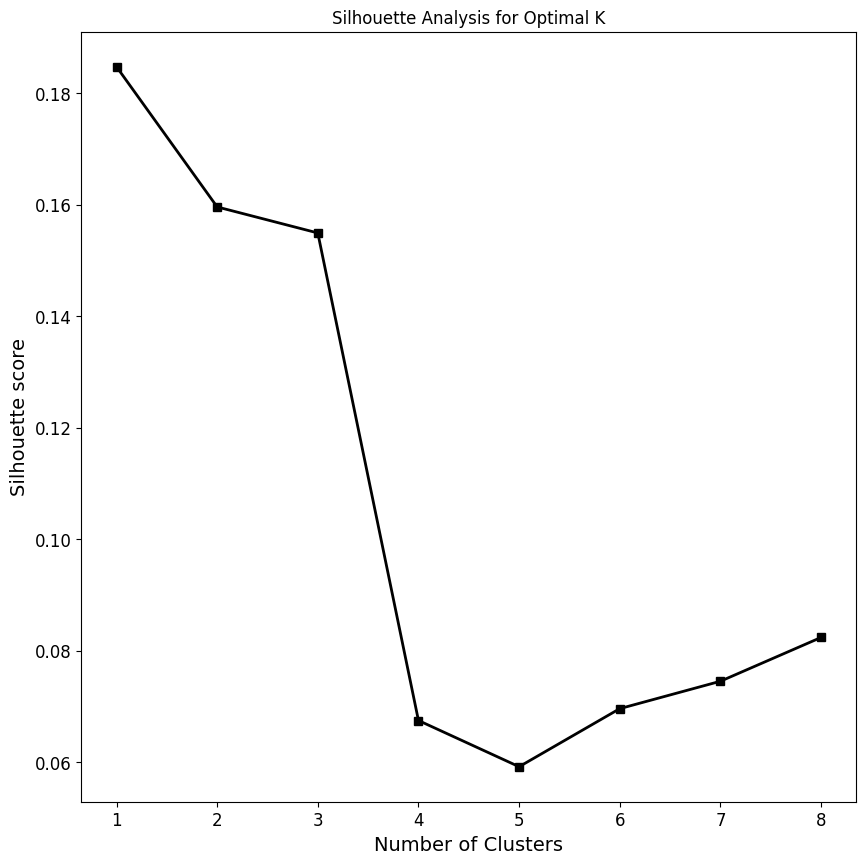

In [224]:
plt.plot(Ncluster,silhouette_ann,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [225]:
df_2020 = pd.DataFrame(df_2020)

In [226]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.234773,-0.756081,0.331240,-0.086309,-0.668096,-0.136108,-0.247301,-0.118514,-0.227238,-0.177290,...,-0.286141,1.789178,0.717957,-0.178112,-0.120464,0.272528,-0.048822,0.679527,0.674372,1.295053
1,0.902294,-0.405995,-0.488267,0.154311,0.392917,-0.217713,-0.036567,0.023447,0.838128,-0.497351,...,1.216612,0.566247,-0.350341,0.936521,-0.286115,-0.251352,-0.388262,0.636970,0.687478,-0.083720
2,0.393415,0.160247,-0.221872,-0.363929,-0.652722,-0.261989,-0.266062,-0.158951,-0.330616,-0.723054,...,0.013247,0.362671,0.892467,0.123439,-0.247587,0.399357,-0.392353,0.653415,0.765379,0.486338
3,-0.203553,0.033901,0.260373,-0.335268,-0.547913,0.735082,-0.008888,0.109097,-0.261051,-0.469445,...,-0.138079,0.948295,0.708836,-0.167605,-0.219718,0.542245,-0.289172,0.730722,0.606502,0.522547
4,0.175141,-0.457251,-0.335292,0.086511,0.215844,-0.260839,-0.260664,-0.164073,-0.251095,-0.579997,...,0.019069,0.408589,1.122871,0.263333,0.034992,0.075194,-0.414900,0.637259,0.731431,0.724269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,-0.477562,0.964278,0.060590,-0.894656,0.169282,-0.011115,0.049671,-0.154898,0.450506,-0.796428,...,-1.032905,1.607371,0.602243,-0.622751,0.305231,0.561521,-0.454563,-0.763530,1.056133,-0.617684
2180,-0.486775,2.431987,-0.427982,1.356035,-0.302189,-0.135316,-0.235277,-0.160304,0.771752,-0.466188,...,-0.806042,-1.152615,1.208814,-0.537855,0.909363,-0.038036,-0.426358,-0.877168,1.098084,-0.795107
2181,-0.528713,0.916985,0.258807,-0.667294,-0.147172,-0.175703,-0.256001,-0.159599,0.557131,0.498386,...,-1.010207,0.071132,0.067506,-0.789224,1.180090,-0.089529,-0.377663,-0.794050,0.832345,-0.740931
2182,-0.520775,1.507777,0.286865,-0.172333,0.753131,0.113324,-0.009806,-0.149076,-0.397043,-0.419619,...,-0.969860,0.257597,1.156151,-0.757480,0.434138,0.575082,-0.466867,-0.962678,0.903345,-0.584648


Implement a weighted K-means


1. K-means without weight

In [233]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_2020)
print(kmeans)

y_kmean = kmeans.predict(df_2020)
df_2020['cluster']= y_kmean

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [234]:
df_2020['cluster']


0       2
1       1
2       2
3       2
4       2
       ..
2179    2
2180    2
2181    2
2182    2
2183    2
Name: cluster, Length: 2184, dtype: int32

2. K-Means avec weighted pop

In [238]:
kmeans = KMeans(n_clusters=3)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
print(kmeans)
y_kmean = kmeans.predict(df_2020)
df_2020['cluster_pop']= y_kmean

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [239]:
df_2020['cluster_pop']

0       2
1       2
2       2
3       2
4       2
       ..
2179    2
2180    2
2181    2
2182    2
2183    2
Name: cluster_pop, Length: 2184, dtype: int32

3. K-Means with weight on the surface

In [242]:
kmeans = KMeans(n_clusters=3)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
print(kmeans)
y_kmean = kmeans.predict(df_2020)
df_2020['cluster_surf']= y_kmean

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [243]:
df_2020['cluster_surf']

0       1
1       1
2       1
3       1
4       1
       ..
2179    1
2180    1
2181    1
2182    1
2183    1
Name: cluster_surf, Length: 2184, dtype: int32

3. Kmeans en fonction du PCA

In [ ]:
nostdf_2020 #avec les valeurs non-standardisées 

1. importer les valeurs 


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_2020) #valeurs PCA ===> en fonction des scores 
print(kmeans)

y_kmean = kmeans.predict(df_2020)
df_2020['cluster']= y_kmean

In [231]:
df_2020.to_csv('data_kmeansweighted', index = False, sep='\t')

## Self-Organizing Map algorithm